In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

In [21]:
#images for nodes
icons = {
    "router": "C:\\Users\\cstuart\\Desktop\\git\\pers\\misc\\python\\network_diag\\icons\\png\\router.png",
    "switch": "C:\\Users\\cstuart\\Desktop\\git\\pers\\misc\\python\\network_diag\\icons\\png\\switch.png",
    "computer": "C:\\Users\\cstuart\\Desktop\\git\\pers\\misc\\python\\network_diag\\icons\\png\\computer.png",
    "server": "C:\\Users\\cstuart\\Desktop\\git\\pers\\misc\\python\\network_diag\\icons\\png\\server.png",
}

#load defined images
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [22]:
# Generate the computer network graph
G = nx.Graph()

G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("computer_" + str(i) + "_" + str(j), image=images["computer"])

G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "computer_" + str(u) + "_" + str(v))

C:\Users\cstuart\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


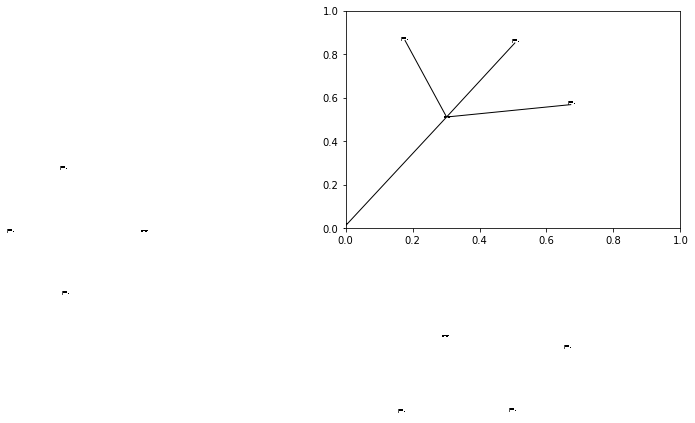

In [23]:
# Get a reproducible layout and create figure
pos = nx.spring_layout(G, seed=1734289230)
fig, ax = plt.subplots()

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)
# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
plt.show()